In [54]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [55]:
def read_stats(rootdir):
    stat_files = []

    for file in os.listdir(rootdir):
        stat_files.append(os.fsdecode(rootdir + '/' + file))

    print(stat_files)
    raw_stats = []
    for file in stat_files:
        raw_stats.append(pickle.load(open(file, 'rb')))

    scores, survived, reward, time, steps = {}, {}, {}, {}, {}

    statistics = {}

    #N_gen = 100*int(stat_files[0][45]) + 10*int(stat_files[0][46]) + int(stat_files[0][47])
    N_gen = 100*int(stat_files[0][-18]) + 10*int(stat_files[0][-17]) + int(stat_files[0][-16])

    for gen in raw_stats:
        gen_score, gen_survived, gen_reward, gen_time, gen_steps = np.array([]), np.array([]), np.array([]), np.array([]), np.array([])

        for ep in gen[0]:
            gen_score = np.append(gen_score, ep['score'])
            # gen_survived = np.append(gen_survived, ep['alive'])
            if ep['steps'] < 400:
                gen_survived = np.append(gen_survived, False)
            else:
                gen_survived = np.append(gen_survived, True)
            gen_reward = np.append(gen_reward, ep['reward'])
            gen_time = np.append(gen_time, ep['mean_time'])
            gen_steps = np.append(gen_steps, ep['steps'])

        scores[N_gen] = gen_score
        survived[N_gen] = gen_survived
        reward[N_gen] = gen_reward
        time[N_gen] = gen_time
        steps[N_gen] = gen_steps
        N_gen += 1
    
    return scores, survived, reward, time, steps

In [56]:
def get_xy(dictionary):
    y = []
    x = []
    for gen, val in dictionary.items():
        x.append(gen)
        y.append(np.mean(val))
    
    return x,y

In [57]:
rootdir = os.fsdecode('agent_code/my_agent/Training_data/statistics_mlp')
scores1, survived1, reward1, time1, steps1 = read_stats(rootdir)
label1 = "mlp"

['agent_code/my_agent/Training_data/statistics_mlp/001_statistics.txt', 'agent_code/my_agent/Training_data/statistics_mlp/002_statistics.txt', 'agent_code/my_agent/Training_data/statistics_mlp/003_statistics.txt', 'agent_code/my_agent/Training_data/statistics_mlp/004_statistics.txt', 'agent_code/my_agent/Training_data/statistics_mlp/005_statistics.txt', 'agent_code/my_agent/Training_data/statistics_mlp/006_statistics.txt', 'agent_code/my_agent/Training_data/statistics_mlp/007_statistics.txt', 'agent_code/my_agent/Training_data/statistics_mlp/008_statistics.txt', 'agent_code/my_agent/Training_data/statistics_mlp/009_statistics.txt']


In [58]:
rootdir = os.fsdecode('agent_code/my_agent/Training_data/statistics_10_s_532')
scores2, survived2, reward2, time2, steps2 = read_stats(rootdir)
label2 = "forest, gamma=1.0, simple agents, 532 features"

['agent_code/my_agent/Training_data/statistics_10_s_532/001_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/002_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/003_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/004_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/005_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/006_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/007_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/008_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/009_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/010_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/011_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/012_statistics.txt', 'agent_code/my_agent/Training_data/statistics_10_s_532/013_statistics.txt', 'agent_code

In [59]:
rootdir = os.fsdecode('agent_code/my_agent/Training_data/statistics_09_r_532')
scores3, survived3, reward3, time3, steps3 = read_stats(rootdir)
label3 = "forest, gamma=0.9, self trained, 532 features"

['agent_code/my_agent/Training_data/statistics_09_r_532/000_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/001_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/002_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/003_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/004_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/005_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/006_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/007_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/008_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/009_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/010_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/011_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_r_532/012_statistics.txt', 'agent_code

In [60]:
rootdir = os.fsdecode('agent_code/my_agent/Training_data/statistics_09_s_532')
scores4, survived4, reward4, time4, steps4 = read_stats(rootdir)
label4 = "forest, gamma=0.9, simple agents, 532 features"

['agent_code/my_agent/Training_data/statistics_09_s_532/001_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/002_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/003_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/004_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/005_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/006_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/007_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/008_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/009_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/010_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/011_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/012_statistics.txt', 'agent_code/my_agent/Training_data/statistics_09_s_532/013_statistics.txt', 'agent_code

In [61]:
rootdir = os.fsdecode('agent_code/my_agent/Training_data/statistics')
scores5, survived5, reward5, time5, steps5 = read_stats(rootdir)
label5 = "forest, gamma=0.9, simple agents, 180 features"

['agent_code/my_agent/Training_data/statistics/001_statistics.txt', 'agent_code/my_agent/Training_data/statistics/002_statistics.txt', 'agent_code/my_agent/Training_data/statistics/003_statistics.txt', 'agent_code/my_agent/Training_data/statistics/004_statistics.txt', 'agent_code/my_agent/Training_data/statistics/005_statistics.txt', 'agent_code/my_agent/Training_data/statistics/006_statistics.txt', 'agent_code/my_agent/Training_data/statistics/007_statistics.txt', 'agent_code/my_agent/Training_data/statistics/008_statistics.txt', 'agent_code/my_agent/Training_data/statistics/009_statistics.txt', 'agent_code/my_agent/Training_data/statistics/010_statistics.txt', 'agent_code/my_agent/Training_data/statistics/011_statistics.txt', 'agent_code/my_agent/Training_data/statistics/012_statistics.txt', 'agent_code/my_agent/Training_data/statistics/013_statistics.txt']


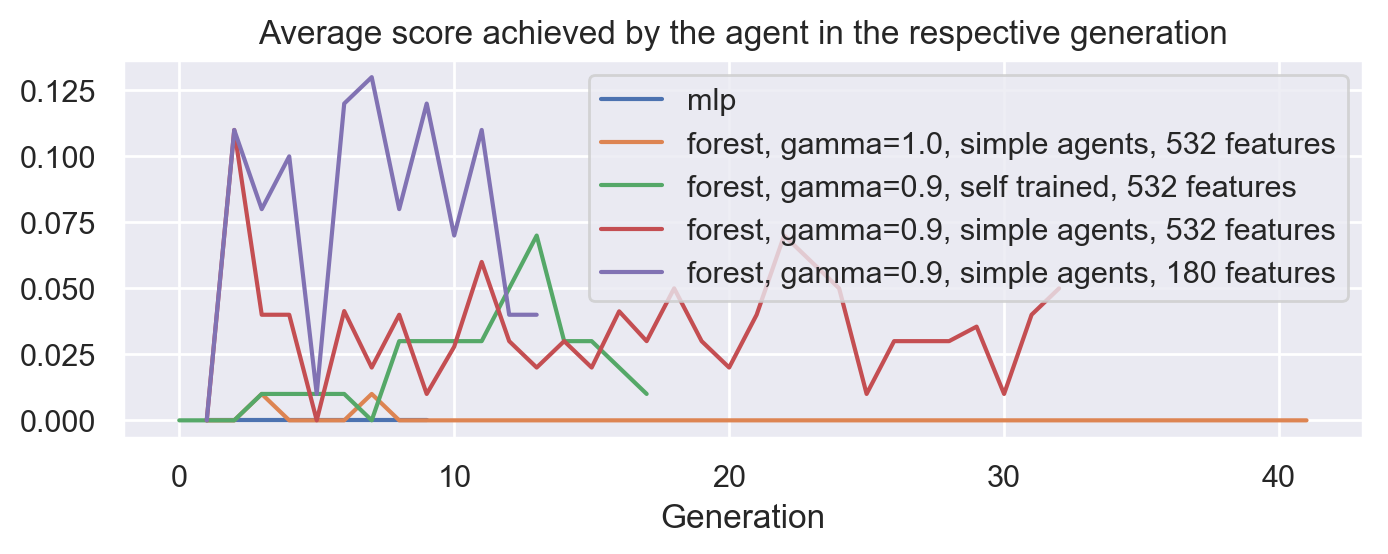

In [62]:
plt.figure(figsize=(8,2.5),dpi=200)
plt.title('Average score achieved by the agent in the respective generation')

x1, y1 = get_xy(scores1)
x2, y2 = get_xy(scores2)
x3, y3 = get_xy(scores3)
x4, y4 = get_xy(scores4)
x5, y5 = get_xy(scores5)

plt.xlabel('Generation')
plt.plot(x1, y1, label=label1)
plt.plot(x2, y2, label=label2)
plt.plot(x3, y3, label=label3)
plt.plot(x4, y4, label=label4)
plt.plot(x5, y5, label=label5)
plt.legend()
plt.show()

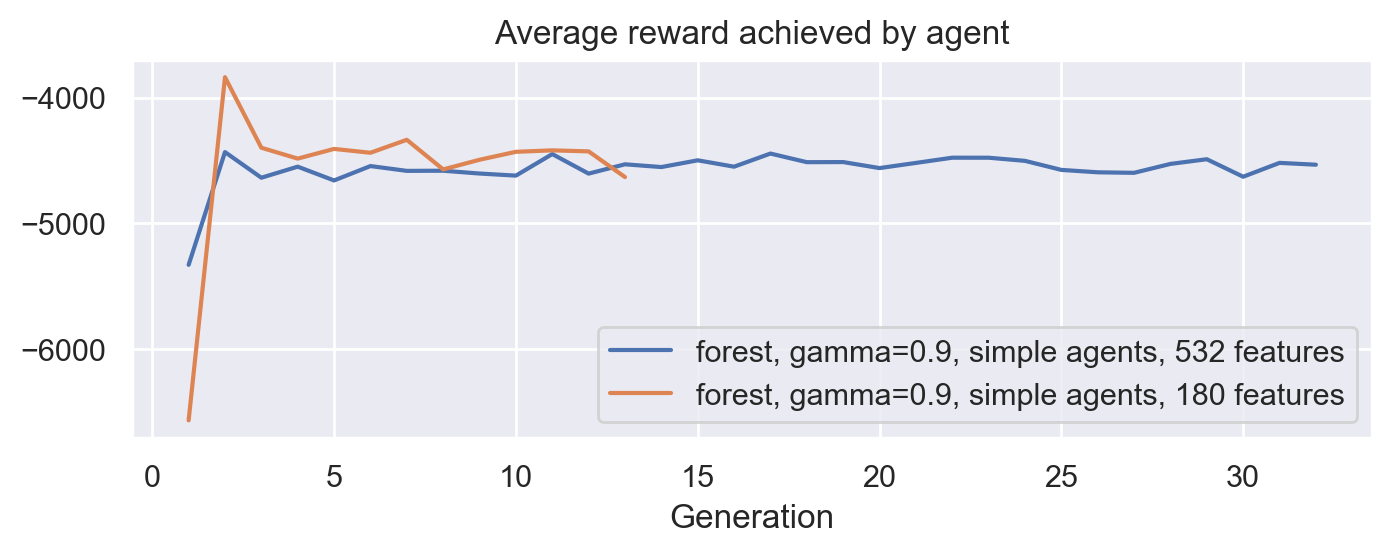

In [75]:
#scores, survived, reward, time, steps
plt.figure(figsize=(8,2.5),dpi=200)
plt.title('Average reward achieved by agent')

#x1, y1 = get_xy(reward1)
#x2, y2 = get_xy(steps2)
#x3, y3 = get_xy(reward3)
x4, y4 = get_xy(reward4)
x5, y5 = get_xy(reward5)

plt.xlabel('Generation')
#plt.plot(x1, y1, label=label1)
#plt.plot(x2, y2, label=label2)
#plt.plot(x3, y3, label=label3)
plt.plot(x4, y4, label=label4)
plt.plot(x5, y5, label=label5)
plt.legend()
plt.show()

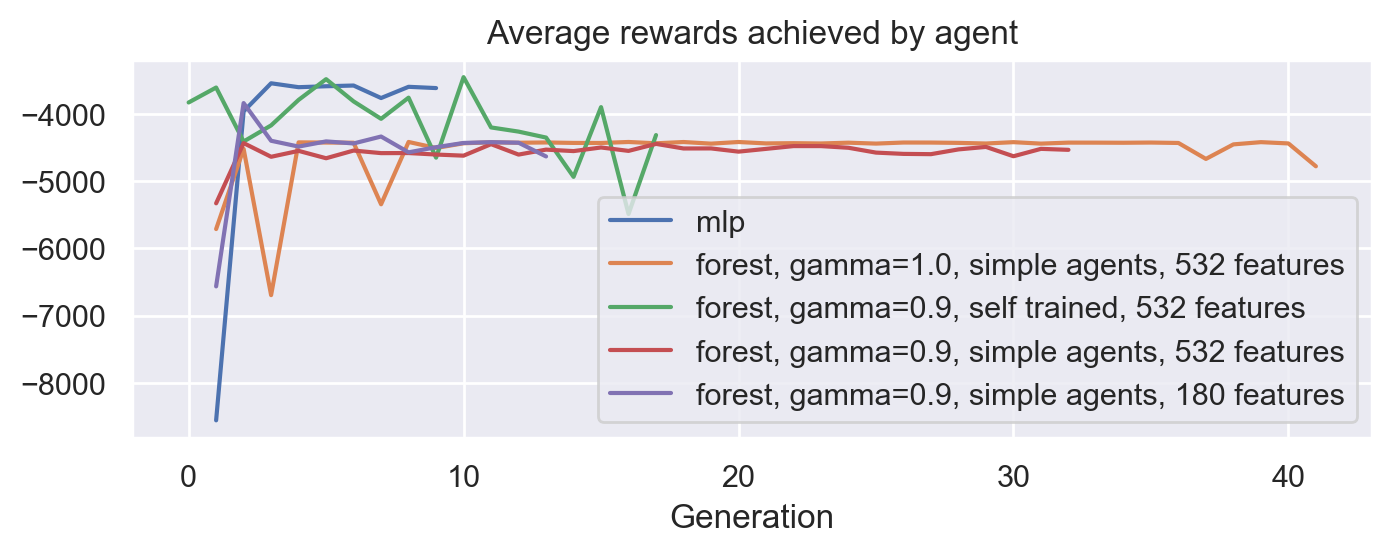

In [64]:
#scores, survived, reward, time, steps
plt.figure(figsize=(8,2.5),dpi=200)
plt.title('Average rewards achieved by agent')

x1, y1 = get_xy(reward1)
x2, y2 = get_xy(reward2)
x3, y3 = get_xy(reward3)
x4, y4 = get_xy(reward4)
x5, y5 = get_xy(reward5)

plt.xlabel('Generation')
plt.plot(x1, y1, label=label1)
plt.plot(x2, y2, label=label2)
plt.plot(x3, y3, label=label3)
plt.plot(x4, y4, label=label4)
plt.plot(x5, y5, label=label5)
plt.legend()
plt.show()

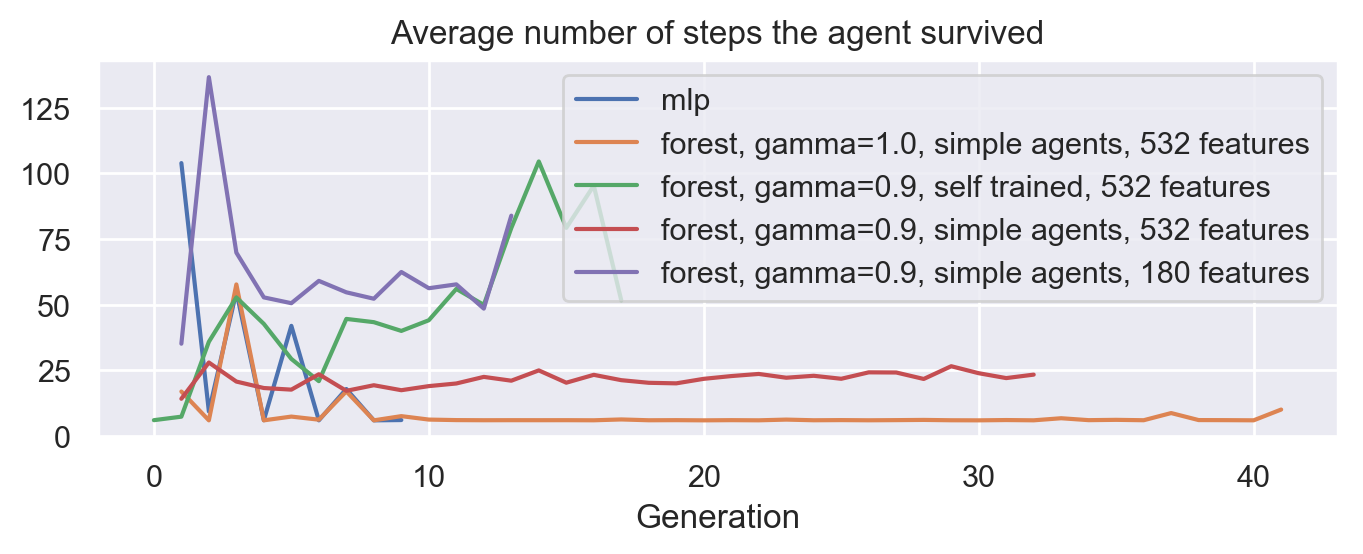

In [65]:
#scores, survived, reward, time, steps
plt.figure(figsize=(8,2.5),dpi=200)
plt.title('Average number of steps the agent survived')

x1, y1 = get_xy(steps1)
x2, y2 = get_xy(steps2)
x3, y3 = get_xy(steps3)
x4, y4 = get_xy(steps4)
x5, y5 = get_xy(steps5)

plt.xlabel('Generation')
plt.plot(x1, y1, label=label1)
plt.plot(x2, y2, label=label2)
plt.plot(x3, y3, label=label3)
plt.plot(x4, y4, label=label4)
plt.plot(x5, y5, label=label5)
plt.legend()
plt.show()

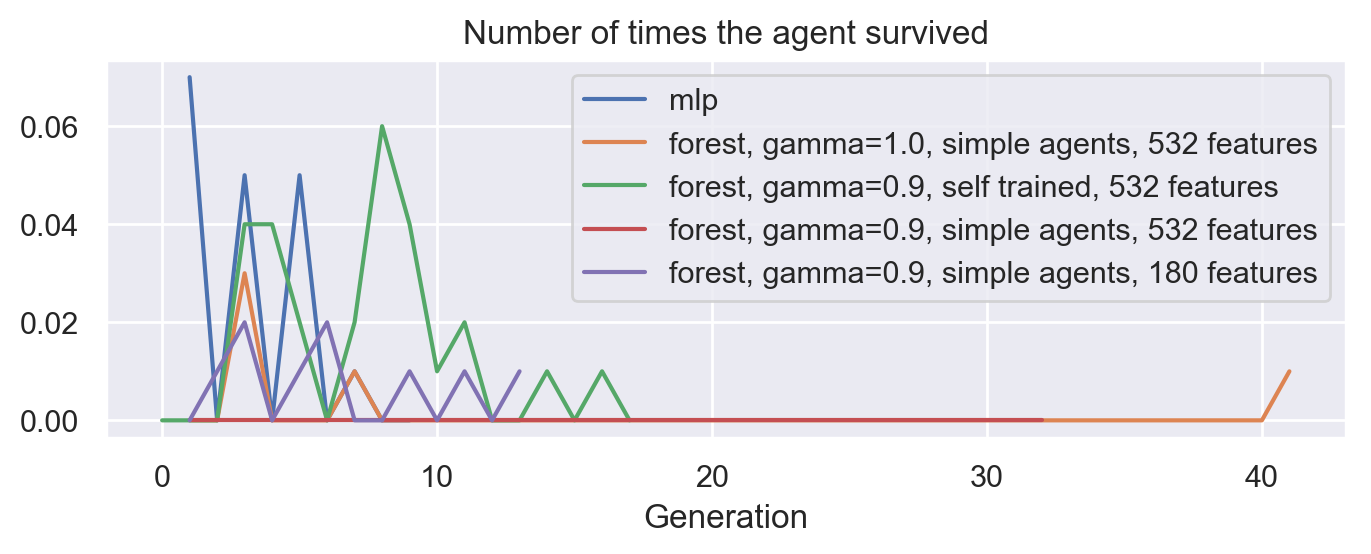

In [66]:
#scores, survived, reward, time, steps
plt.figure(figsize=(8,2.5),dpi=200)
plt.title('Number of times the agent survived')

x1, y1 = get_xy(survived1)
x2, y2 = get_xy(survived2)
x3, y3 = get_xy(survived3)
x4, y4 = get_xy(survived4)
x5, y5 = get_xy(survived5)

plt.xlabel('Generation')
plt.plot(x1, y1, label=label1)
plt.plot(x2, y2, label=label2)
plt.plot(x3, y3, label=label3)
plt.plot(x4, y4, label=label4)
plt.plot(x5, y5, label=label5)
plt.legend()
plt.show()

In [67]:
rootdir = os.fsdecode('agent_code/my_agent/Training_data/trees')

stat_files = []

for file in os.listdir(rootdir):
    stat_files.append(os.fsdecode(rootdir + '/' + file))
    
print(stat_files[-5])
regressor_BOMB = pickle.load(open(stat_files[-6], 'rb'))
regressor_DOWN = pickle.load(open(stat_files[-5], 'rb'))
regressor_LEFT = pickle.load(open(stat_files[-4], 'rb'))
regressor_RIGHT = pickle.load(open(stat_files[-3], 'rb'))
regressor_UP = pickle.load(open(stat_files[-2], 'rb'))
regressor_WAIT = pickle.load(open(stat_files[-1], 'rb'))
print('regressors loaded')

agent_code/my_agent/Training_data/trees/013_DOWN.txt
regressors loaded


C:\Users\karlt\Anaconda3\envs\ml_homework\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\karlt\Anaconda3\envs\ml_homework\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\karlt\Anaconda3\envs\ml_homework\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\karlt\Anaconda3\envs\ml_homework\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from vers

In [68]:
print(np.argsort(regressor_BOMB.feature_importances_))
print(np.argsort(regressor_WAIT.feature_importances_))

[133 138  38  54  56 124 119 146 112 109 106 105  90 103 100  82  27  98
  11 163  55   1 117 113  44  71  66 102  41 151  74  88  99  89 148  64
 122  21  35 150  48 127  58  18  91  39  72 120  20  70 111  87  85  46
 154 158 156 104 130  93  52  42  10  15 135  12  33   3 140 165  79  81
 159 155  61  28 170 144   4 118  26  29  16 126  57   6  43  94  45 131
  24  51  80 160  65  78 137 139 149  83  75  86 110  53  60 101  31 145
   7  67  22 108 132  63  25 121   8  40 153   9  76  73 116 134 168 162
 115 157  95 167 141 136 123  96 125  62 164  84  36  77 147 152  59  34
  68  50 143 107  92 166  23  32 169  97  19  69 142 173  30 129  49 114
 172   2 128 161  47 174 179 171 175   0  14  13  37  17   5 178 177 176]
[178  87 101  38  85  18  79  88  65 112  32  86 146 111  91  12  52  31
  54  75  53 152 103  77 108 167  41  51 109  76 117  56 134  97 133  93
  80  73  66 105 118  89  95  72 113 157 124 120  36  92  64 119  58  62
  57  82 143  98  46  42  49  17  67  69  33 156  

In [69]:
import numpy as np

tester = np.arange(5)
gammas = 0.9**np.arange(tester.shape[0])
output = []
for y in range(tester.shape[0]):
    output.append(np.sum(tester[y:]*gammas[:tester.shape[0]-y]))

print (tester)
print (output)
print (0.9+0.9**2*2+0.9**3*3+0.9**4*4)

[0 1 2 3 4]
[7.3314, 8.146, 7.94, 6.6, 4.0]
7.3314
